# CallableGraph Examples

## Imports

In [3]:
from typing import Tuple, List, Dict, Any
from callable_graph.callable import CallableGraph
from callable_graph.visualisation import to_graphviz, Orientation

## Define Functions

In [4]:
def my_halve(x: int) -> int:
    return x // 2

In [5]:
def my_add(*x: int) -> int:
    return sum(x)

In [6]:
def my_xor(x: int, y: int) -> int:
    return x ^ y

In [7]:
def tuple_example(x: int) -> Tuple[int, str]:
    return x, str(x)

In [8]:
def squared_sum(x: int, y: int) -> int:
    return x**2 + y**2

In [9]:
def listed(x: int, y: int) -> List[Dict[str, Any]]:
    return [dict(x=x, y=y)]

## Build CallableGraph (with default return and no subgraphs)

In [10]:
graph = (
    CallableGraph.builder()
    .with_edge(hash, str, hash, inputs="input_0", outputs="hashed_twice")
    .with_edge(my_halve, inputs="input_1", outputs="halved")
    .with_edge(
        my_add, str, inputs=("hashed_twice", "halved", "input_1"), outputs="added"
    )
    .with_edge(my_xor, inputs=("halved", "hashed_twice"), outputs="xored")
    .with_edge(tuple_example, inputs="halved", outputs=("t_0", "t_1"))
    .with_edge(squared_sum, inputs=("halved", "hashed_twice"), outputs="squared_sum")
    .build()
)

## Visualise

All nodes have the same `alpha` value or transluscence.

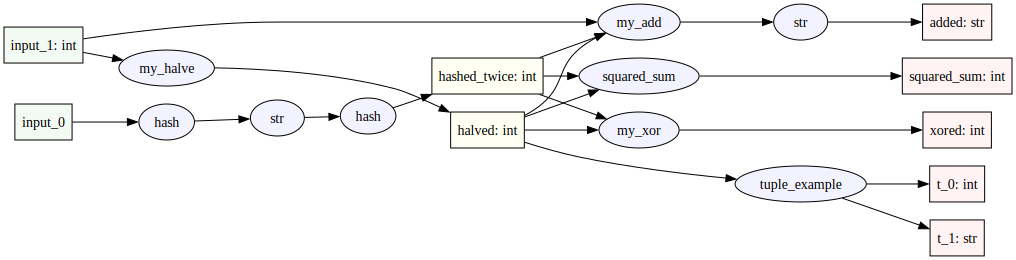

In [11]:
to_graphviz(graph)

# Orientation
By default, the orientation is "left to right". Other choices are as follows.

In [12]:
help(Orientation)

Help on class Orientation in module callable_graph.visualisation._visualisation_info:

class Orientation(builtins.str, enum.Enum)
 |  Orientation(value, names=None, *, module=None, qualname=None, type=None, start=1)
 |  
 |  An enum to specify the orientation of callable graph visualisations.
 |  
 |  Method resolution order:
 |      Orientation
 |      builtins.str
 |      enum.Enum
 |      builtins.object
 |  
 |  Data and other attributes defined here:
 |  
 |  BOTTOM_TO_TOP = <Orientation.BOTTOM_TO_TOP: 'BT'>
 |  
 |  LEFT_TO_RIGHT = <Orientation.LEFT_TO_RIGHT: 'LR'>
 |  
 |  RIGHT_TO_LEFT = <Orientation.RIGHT_TO_LEFT: 'RL'>
 |  
 |  TOP_TO_BOTTOM = <Orientation.TOP_TO_BOTTOM: 'TB'>
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from enum.Enum:
 |  
 |  name
 |      The name of the Enum member.
 |  
 |  value
 |      The value of the Enum member.
 |  
 |  ----------------------------------------------------------------

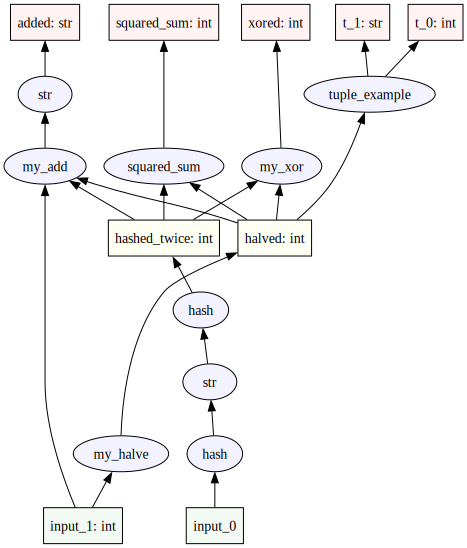

In [13]:
to_graphviz(graph, orientation=Orientation.BOTTOM_TO_TOP)

## Output (with default return)

In [14]:
data = graph(input_0="to_hash", input_1=8)

In [15]:
data

{'input_0': 'to_hash',
 'input_1': 8,
 'halved': 4,
 'hashed_twice': 8626420035327703662,
 'squared_sum': 74415122625903220095946726030088210260,
 'added': '8626420035327703674',
 't_0': 4,
 't_1': '4',
 'xored': 8626420035327703658}

## Build `CallableGraph` (with subgraphs)

In [16]:
inner_graph = (
    CallableGraph.builder()
    .with_edge(my_halve, str, hash, inputs="inner_input", outputs="inner_output_0")
    .with_edge(str, hash, inputs="inner_input", outputs="inner_output_1")
)

middle_graph = (
    CallableGraph.builder()
    .with_subgraph(other=inner_graph, name="inner")
    .with_edge(my_halve, str, hash, inputs="inner_output_0", outputs="middle_output_0")
    .with_edge(str, hash, inputs="inner_output_0", outputs="middle_output_1")
)


graph_with_subgraphs = (
    CallableGraph.builder()
    .with_subgraph(other=middle_graph, name="middle")
    .with_edge(hash, str, hash, inputs="input_0", outputs="hashed_twice")
    .with_edge(my_halve, inputs="input_1", outputs="halved")
    .with_edge(
        my_add,
        str,
        inputs=("middle_output_0", "hashed_twice", "halved", "input_1"),
        outputs="added",
    )
    .with_edge(my_xor, inputs=("halved", "hashed_twice"), outputs="xored")
    .with_edge(tuple_example, inputs="halved", outputs=("t_0", "t_1"))
    .build()
)

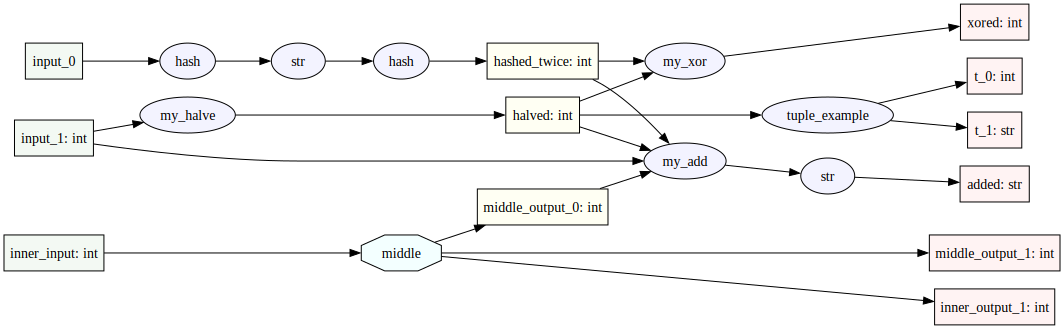

In [17]:
to_graphviz(graph=graph_with_subgraphs)

## Build CallableGraph (with tuple return)

In [18]:
graph = (
    CallableGraph.builder()
    .with_edge(hash, str, hash, inputs="input_0", outputs="hashed_twice")
    .with_edge(my_halve, inputs="input_1", outputs="halved")
    .with_edge(
        my_add, str, inputs=("hashed_twice", "halved", "input_1"), outputs="added"
    )
    .with_edge(my_xor, inputs=("halved", "hashed_twice"), outputs="xored")
    .with_edge(tuple_example, inputs="halved", outputs=("t_0", "t_1"))
    .with_edge(squared_sum, inputs=("halved", "hashed_twice"), outputs="squared_sum")
    .and_return("added", "t_0")
    .build()
)

## Visualise (with tuple return)

Output nodes have a different `alpha` value or transluscence.

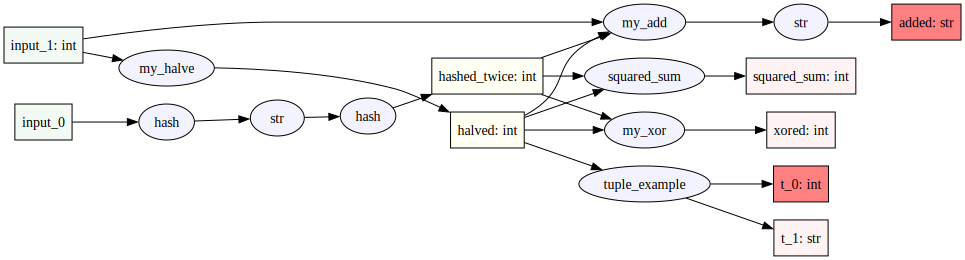

In [19]:
to_graphviz(graph)

## Output (with tuple return)

In [20]:
data = graph(input_0="to_hash", input_1=8)

In [21]:
data

('8626420035327703674', 4)